# Compare different sea level projections (KNMI'14, AR6, klimaatsignaal'21, KNMI'23)

Main differences between the scenarios:
- Subsidence is included in klimaatsignaal not in KNMI'14 (0.45 mm/yr)
- Temperature uncertainty is included in klimaatsignaal not in KNMI'14

In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [26]:
Projects_dir = '/Users/dewilebars/Projects/'
proj_dir = f'{Projects_dir}Project_ProbSLR/Data_Proj/'

fig_out = './'

ProbSLR_dir = f'{Projects_dir}Project_ProbSLR/SLProj/'

## Read input data

### Read klimaatsignaal'21 projections

In [27]:
def read_proj(sce, name):
    '''Read projection data and add subsidence'''
    
    proj_data_dir = ('/Users/dewilebars/Projects/Project_ProbSLR/SLProj/'+
                     'outputs/KNMIsignal_v3/')
    proj_ds = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_{name}_{sce}.nc')
    subsidence = (np.arange(len(proj_ds.time))+10) * 0.045
    sub_2d = np.repeat(subsidence[:,np.newaxis], 
                       repeats=len(proj_ds.percentiles), axis=1)
    sub_2d = np.swapaxes(sub_2d,0,1)
    tot_sub = sub_2d+proj_ds.perc_ts.sel(proc='Total').values
    sub = np.concatenate([sub_2d[np.newaxis,:,:],  tot_sub[np.newaxis,:,:]],
                         axis=0)
    proj_sub = xr.DataArray(sub, dims=proj_ds.perc_ts.dims, 
                            coords=[['Subsidence', 'Total_with_sub'], 
                                    proj_ds.percentiles, proj_ds.time])
    proj_sub = xr.concat([proj_ds.perc_ts, proj_sub], dim='proc')
    
    return proj_sub

In [28]:
name = 'KNMIsignal_BiasCorr_NoWind'

proj_ssp126_ds = read_proj('ssp126', name)
proj_ssp245_ds = read_proj('ssp245', name)
proj_ssp585_ds = read_proj('ssp585', name)


In [29]:
proj_ssp245_ds


<xarray.DataArray 'perc_ts' (proc: 13, percentiles: 11, time: 95)>
array([[[  0.20272045,   0.21029738,   0.33586413, ...,  12.50392144,
          12.66092661,  12.66092661],
        [  0.45925895,   0.49051201,   0.6209091 , ...,  15.0704054 ,
          15.25177449,  15.25177449],
        [  0.59441623,   0.63814306,   0.77108501, ...,  16.42255723,
          16.61676244,  16.61676244],
        ...,
        [  1.54546836,   1.67696852,   1.82781772, ...,  25.9371526 ,
          26.22168093,  26.22168093],
        [  1.68079992,   1.82478993,   1.97818727, ...,  27.29104793,
          27.58842894,  27.58842894],
        [  1.93599479,   2.10353693,   2.26173931, ...,  29.84408985,
          30.16570717,  30.16570717]],

       [[ -1.50718929,  -1.3998138 ,  -1.75448696, ...,  -0.13663318,
          -0.73261676,  -0.73261676],
        [ -0.90406825,  -0.6832587 ,  -0.96971197, ...,   2.10803694,
           1.71606951,   1.71606951],
        [ -0.58631398,  -0.30574171,  -0.55625334, ...,   3.29064118,
           3.00615963,   3.00615963],
...
        [  0.45      ,   0.495     ,   0.54      , ...,   4.59      ,
           4.635     ,   4.68      ],
        [  0.45      ,   0.495     ,   0.54      , ...,   4.59      ,
           4.635     ,   4.68      ],
        [  0.45      ,   0.495     ,   0.54      , ...,   4.59      ,
           4.635     ,   4.68      ]],

       [[  0.7729043 ,   1.05183275,   0.90246187, ...,  32.39814658,
          32.78966439,  33.01257564],
        [  1.46627238,   1.90268976,   1.87327973, ...,  40.32933046,
          40.83964205,  41.12242875],
        [  1.83121292,   2.35410478,   2.38574161, ...,  44.61535056,
          45.1897139 ,  45.5034611 ],
        ...,
        [  4.40020484,   5.51731137,   5.99591822, ...,  86.16843717,
          87.2872086 ,  87.97594011],
        [  4.76616079,   5.96779077,   6.5113627 , ...,  93.77932632,
          94.9866358 ,  95.75321064],
        [  5.45637726,   6.81413107,   7.47876478, ..., 107.94609188,
         109.32565077, 110.22554646]]])
Coordinates:
  * proc         (proc) object 'Global steric' ... 'Total_with_sub'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
  * time         (time) int64 2006 2007 2008 2009 2010 ... 2097 2098 2099 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

### Read KNMI'14 projections

In [30]:
path_KNMI14 = '/Users/dewilebars/Projects/Project_ProbSLR/KNMI14/'
# Info on the "level" index: 
# mean, p05, p10, p50, p90, p95, last column not used.
perc_dic = {'mean':1, 5: 2, 10: 3, 50:4, 90:5, 95:6}

KNMI14_high_ds = xr.open_dataset(path_KNMI14 + 
                    '/ComponentInfo/ENS_knmi_NORTHSEA_slscen_high_V8.nc', 
                                 decode_times=False)
KNMI14_low_ds = xr.open_dataset(path_KNMI14 + 
                    '/ComponentInfo/ENS_knmi_NORTHSEA_slscen_low_V8.nc', 
                                decode_times=False)
KNMI14_high_ds['time'] = KNMI14_high_ds.time + 1950
KNMI14_low_ds['time'] = KNMI14_low_ds.time + 1950

KNMI14_low_ds = KNMI14_low_ds.sel(lat=0,lon=0)
KNMI14_high_ds = KNMI14_high_ds.sel(lat=0,lon=0)
#KNMI14_high_ds = KNMI14_high_ds.drop_dims(['lat', 'lon'])
KNMI14_high_ds

<xarray.Dataset>
Dimensions:  (time: 115, lev: 7)
Coordinates:
  * time     (time) float64 1.986e+03 1.987e+03 1.988e+03 ... 2.099e+03 2.1e+03
    lon      float64 0.0
    lat      float64 0.0
  * lev      (lev) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0
Data variables:
    groundw  (time, lev) float32 ...
    dyn_aa   (time, lev) float32 ...
    dyn_gre  (time, lev) float32 ...
    steric   (time, lev) float32 ...
    ibe      (time, lev) float32 ...
    gic      (time, lev) float32 ...
    smb_aa   (time, lev) float32 ...
    smb_gre  (time, lev) float32 ...
    cmip5    (time, lev) float32 ...
    total    (time, lev) float32 ...
    distr    (time, lev) float32 ...
    tglob    (time, lev) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Mar 23 10:55:18 2020: cdo -ensmean 001_knmi_NORTHSEA_sl...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

Also read the time series of total sea level

In [31]:
knmi_df = pd.read_csv(f'{path_KNMI14}KNMI14_sealevel_scenarios_by_1year_3polfit.csv')
knmi_df.set_index('year', inplace=True)
del(knmi_df['comment'])

knmi_df

,low_05,low_95,high_05,high_95
year,,,,
1995,0.2,0.8,-0.1,0.5
1996,0.4,1.2,0.2,1.0
1997,0.5,1.6,0.5,1.5
1998,0.7,2.0,0.7,2.1
1999,0.8,2.4,1.0,2.6
...,...,...,...,...
2096,26.9,71.7,48.7,93.5
2097,27.1,72.7,49.3,94.9
2098,27.3,73.7,49.8,96.2


The NETCDF files with all the data give scenarios that are about 1 or 2 cm lower in 2100 than the final official scenarios but are still useful to have individual components and more percentiles.

### Read AR6 projections for the Dutch coast

In [32]:
def open_ar6_dataset(scen, loc_id, data_type):
    '''Global steric is not in the regional files, it needs to be read 
    from the global files, but it is included in ocean dynamics.
    scen: Choose an emission scenario
    loc_id: Choose the tide gauge id or geographic location (see doc AR6 for 
    details on selecting geographical location)
    data_type: Height 'values' or 'rates' ar available'''
    
    ar6_dir = f'{proj_dir}/Data_AR6/AR6_Projections/'
    ar6_reg_med_dir = f'{ar6_dir}Regional/medium_confidence/'
    ar6_glo_med_dir = f'{ar6_dir}Global/medium_confidence/'
    processes = ['AIS','GIS','glaciers', 'oceandynamics', 'landwaterstorage', 
                 'verticallandmotion', 'steric', 'total']
    name_seal_level_var = {'values':'sea_level_change', 'rates':'sea_level_change_rate'}
    
    # All datasets have different times available
    years_sel = [2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100]
    percentiles = np.array([5,17,50,83,95])/100
    
    for idx, proc in enumerate(processes):
        if proc=='steric':
            file_path = f'{ar6_glo_med_dir}{scen}/oceandynamics_{scen}_medium_confidence_{data_type}.nc'
            ar6_ds = xr.open_dataset(file_path).sel(locations=-1)
            ar6_ds = ar6_ds.rename({name_seal_level_var[data_type]: 'Global steric', 
                                    'years':'time'})
        else:
            file_path = f'{ar6_reg_med_dir}{scen}/{proc}_{scen}_medium_confidence_{data_type}.nc'
            ar6_ds = xr.open_dataset(file_path).sel(locations=loc_id)
            ar6_ds = ar6_ds.rename({name_seal_level_var[data_type]: proc, 
                                    'years':'time'})
            
        ar6_ds = ar6_ds.sel(time=years_sel, quantiles=percentiles)
        ar6_ds['quantiles'] = np.array(ar6_ds.quantiles, dtype=np.float32)

        if idx==0:
            ar6_full_ds = ar6_ds
        else:
            ar6_full_ds =  xr.merge([ar6_full_ds, ar6_ds], compat='override')
            
    ar6_full_ds = ar6_full_ds.set_coords(('lat', 'lon'))
    ar6_full_ds = ar6_full_ds/10 # Convert mm to cm
            
    return ar6_full_ds

In [33]:
loc_id = 9 #MAASSLUIS:9 - DELFZIJL:24

ar6_ssp126_ds = open_ar6_dataset('ssp126', loc_id, 'values')
ar6_ssp245_ds = open_ar6_dataset('ssp245', loc_id, 'values')
ar6_ssp585_ds = open_ar6_dataset('ssp585', loc_id, 'values')

ar6_ssp126_ds

<xarray.Dataset>
Dimensions:             (time: 9, quantiles: 5)
Coordinates:
    lat                 float32 ...
    lon                 float32 ...
  * time                (time) int32 2020 2030 2040 2050 ... 2070 2080 2090 2100
    locations           int32 9
  * quantiles           (quantiles) float32 0.05 0.17 0.5 0.83 0.95
Data variables:
    AIS                 (quantiles, time) float32 0.1 0.2 0.3 ... 31.6 38.1 45.0
    GIS                 (quantiles, time) float32 0.1 0.1 0.1 ... 2.0 2.3 2.8
    glaciers            (quantiles, time) float32 0.6 1.0 1.1 ... 6.6 7.4 8.3
    oceandynamics       (quantiles, time) float32 -1.5 -1.0 -0.1 ... 43.5 49.0
    landwaterstorage    (quantiles, time) float32 0.0 -0.1 -0.2 ... 2.7 3.2 3.6
    verticallandmotion  (quantiles, time) float32 0.2 0.3 0.5 ... 3.2 3.6 4.1
    Global steric       (quantiles, time) float32 1.6 2.8 4.1 ... 17.3 19.2 21.1
    total               (quantiles, time) float32 0.7 3.0 5.5 ... 70.8 79.4 90.3
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Sat Jul 10 15:19:05 2021
    source:       Files Combined: /projects/kopp/ar6/regional/pboxes/pb_1f/ss...

In [34]:
ar6_ssp126_rate_ds = open_ar6_dataset('ssp126', loc_id, 'rates')
ar6_ssp245_rate_ds = open_ar6_dataset('ssp245', loc_id, 'rates')
ar6_ssp585_rate_ds = open_ar6_dataset('ssp585', loc_id, 'rates')

ar6_ssp126_rate_ds

<xarray.Dataset>
Dimensions:             (time: 9, quantiles: 5)
Coordinates:
    lat                 float32 ...
    lon                 float32 ...
    locations           int32 9
  * time                (time) int32 2020 2030 2040 2050 ... 2070 2080 2090 2100
  * quantiles           (quantiles) float32 0.05 0.17 0.5 0.83 0.95
Data variables:
    AIS                 (quantiles, time) float32 -0.02 -0.02 ... 0.71 0.72
    GIS                 (quantiles, time) float32 0.0 0.0 0.0 ... 0.03 0.04 0.04
    glaciers            (quantiles, time) float32 0.03 0.02 0.02 ... 0.08 0.08
    oceandynamics       (quantiles, time) float32 0.05 0.07 0.04 ... 0.4 0.47
    landwaterstorage    (quantiles, time) float32 -0.01 -0.01 0.0 ... 0.04 0.04
    verticallandmotion  (quantiles, time) float32 0.01 0.02 0.02 ... 0.04 0.04
    Global steric       (quantiles, time) float32 0.12 0.12 0.12 ... 0.19 0.18
    total               (quantiles, time) float32 0.18 0.2 0.18 ... 1.04 1.1
Attributes:
    description:  Combined confidence output file for AR6 sea-level change pr...
    history:      Created Sat Jul 10 15:41:09 2021
    source:       Files Combined: /projects/kopp/ar6/regional/pboxes_rates/pb...

### Read KNMI23 

In [121]:
proj_data_dir = f'{ProbSLR_dir}/outputs/KNMI23/'

KNMI23_ssp126 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp126_v19.nc')
KNMI23_ssp245 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp245_v19.nc')
KNMI23_ssp585 = xr.open_dataset(f'{proj_data_dir}SeaLevelPerc_KNMI23_ssp585_v19.nc')

KNMI23_ssp126 = KNMI23_ssp126.perc_ts
KNMI23_ssp245 = KNMI23_ssp245.perc_ts
KNMI23_ssp585 = KNMI23_ssp585.perc_ts

In [122]:
KNMI23_ssp245

<xarray.DataArray 'perc_ts' (proc: 13, percentiles: 12, time: 106)>
array([[[ 0.000000e+00,  3.117270e-02, ...,  1.265171e+01,  1.278223e+01],
        [ 0.000000e+00,  4.879362e-02, ...,  1.523214e+01,  1.539352e+01],
        ...,
        [ 0.000000e+00,  1.512065e-01, ...,  3.022961e+01,  3.057037e+01],
        [ 0.000000e+00,  9.115580e-02, ...,  2.143571e+01,  2.167129e+01]],

       [[ 0.000000e+00, -1.375142e-01, ...,  2.469915e+00,  2.283690e+00],
        [ 0.000000e+00, -7.958218e-02, ...,  5.805206e+00,  5.685422e+00],
        ...,
        [ 0.000000e+00,  2.571188e-01, ...,  2.518993e+01,  2.545631e+01],
        [ 0.000000e+00,  5.969116e-02, ...,  1.382352e+01,  1.386347e+01]],

       ...,

       [[ 0.000000e+00,  3.700000e-02, ...,  3.848000e+00,  3.885000e+00],
        [ 0.000000e+00,  3.700000e-02, ...,  3.848000e+00,  3.885000e+00],
        ...,
        [ 0.000000e+00,  3.700000e-02, ...,  3.848000e+00,  3.885000e+00],
        [ 0.000000e+00,  3.700000e-02, ...,  3.848000e+00,  3.885000e+00]],

       [[ 0.000000e+00,  2.010236e-02, ...,  3.512702e+01,  3.532098e+01],
        [ 0.000000e+00,  9.783246e-02, ...,  4.232045e+01,  4.261560e+01],
        ...,
        [ 0.000000e+00,  5.787252e-01, ...,  1.305502e+02,  1.323976e+02],
        [ 0.000000e+00,  2.860737e-01, ...,  6.515232e+01,  6.585063e+01]]])
Coordinates:
  * proc         (proc) object 'Global steric' ... 'Total'
  * percentiles  (percentiles) object '1' '5' '10' '17' ... '95' '99' 'mean'
  * time         (time) float64 1.996e+03 1.996e+03 ... 2.1e+03 2.1e+03
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

## Compare sea level

In [101]:
def plot_comp(KNMI14_in, KNMI21_in, KNMI23_in, AR6_in, proc_name):
    
    
    knmi14_perc = {17:5, 50:50, 83:95}
    
    fig, ax = plt.subplots(1, 3, figsize=(12,4))
    
    for idx, perc in enumerate([17,50,83]):

        try:
            KNMI14 = KNMI14_in.sel(lev=perc_dic[knmi14_perc[perc]])
            KNMI14 = KNMI14 - KNMI14.sel(time=2020)
            KNMI14 = KNMI14*100 # Convert from m to cm
            KNMI14.plot(ax=ax[idx],label=f'KNMI14, {knmi14_perc[perc]} p.', 
                        color='tab:blue')
        except:
            print('No KNMI14 data for this case')

        try:
            KNMI21 = KNMI21_in.sel(percentiles=perc)
            KNMI21 = KNMI21 - KNMI21.sel(time=2020)
            KNMI21.plot(ax=ax[idx],label=f'signaal21, {perc} p.', 
                        color='tab:orange')
        except:
            print('No KNMI21 data for this case')
            
        try:
            KNMI23 = KNMI23_in.sel(percentiles=str(perc))
            KNMI23 = KNMI23 - KNMI23.sel(time=2020.5)
            KNMI23.plot(ax=ax[idx],label=f'KNMI23, {perc} p.', 
                        color='tab:grey')
        except:
            print('No KNMI23 data for this case')

        try:
            AR6 = AR6_in.sel(quantiles=perc/100)
            AR6 = AR6-AR6.sel(time=2020)
            AR6.plot(ax=ax[idx],label=f'AR6, {perc} p.', color='tab:green')
        except:
            print('No AR6 data for this case')

        ax[idx].set_ylabel('Sea level change [cm]')
        ax[idx].legend()

    ax[0].set_title('Lower bound likely range')
    ax[1].set_title('Median')
    ax[2].set_title('Higher bound likely range')
    plt.suptitle(proc_name)

    plt.tight_layout();

In [102]:
scen = 'low_ssp245' # high_ssp85 or low_ssp245

if scen == 'high_ssp585':
    KNMI14_ds = KNMI14_high_ds.copy()
    KNMI21_ds = proj_ssp585_ds.copy()
    KNMI23_ds = KNMI23_ssp585.copy()
    AR6_ds = ar6_ssp585_ds.copy()
    
elif scen == 'low_ssp245':
    KNMI14_ds = KNMI14_low_ds.copy()
    KNMI21_ds = proj_ssp245_ds.copy()
    KNMI23_ds = KNMI23_ssp245.copy()
    AR6_ds = ar6_ssp245_ds.copy()

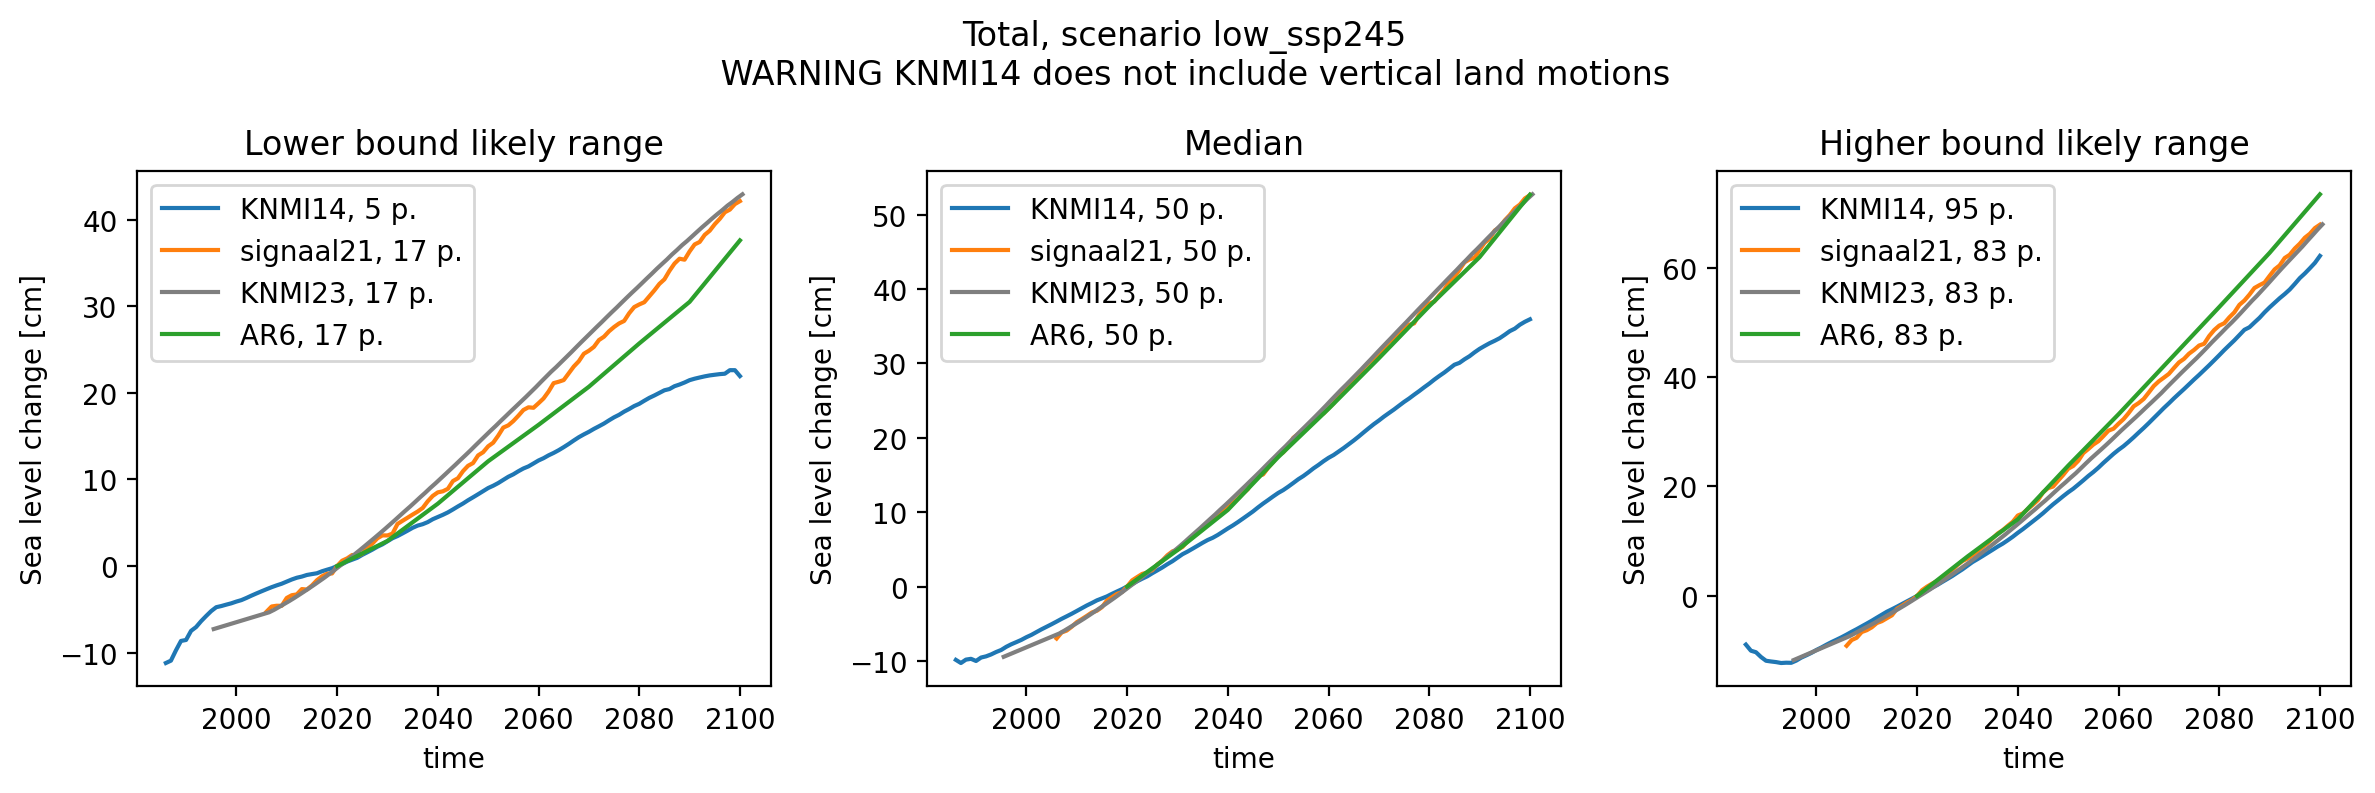

In [103]:
KNMI14_t = KNMI14_ds['total']
KNMI21_t = KNMI21_ds.sel(proc='Total_with_sub')
KNMI23_t = KNMI23_ds.sel(proc='Total')
AR6_t = AR6_ds['total']

pn = 'Total'
plot_comp(KNMI14_t, KNMI21_t, KNMI23_t, AR6_t, f'{pn}, scenario {scen} \n WARNING KNMI14 does not include vertical land motions')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

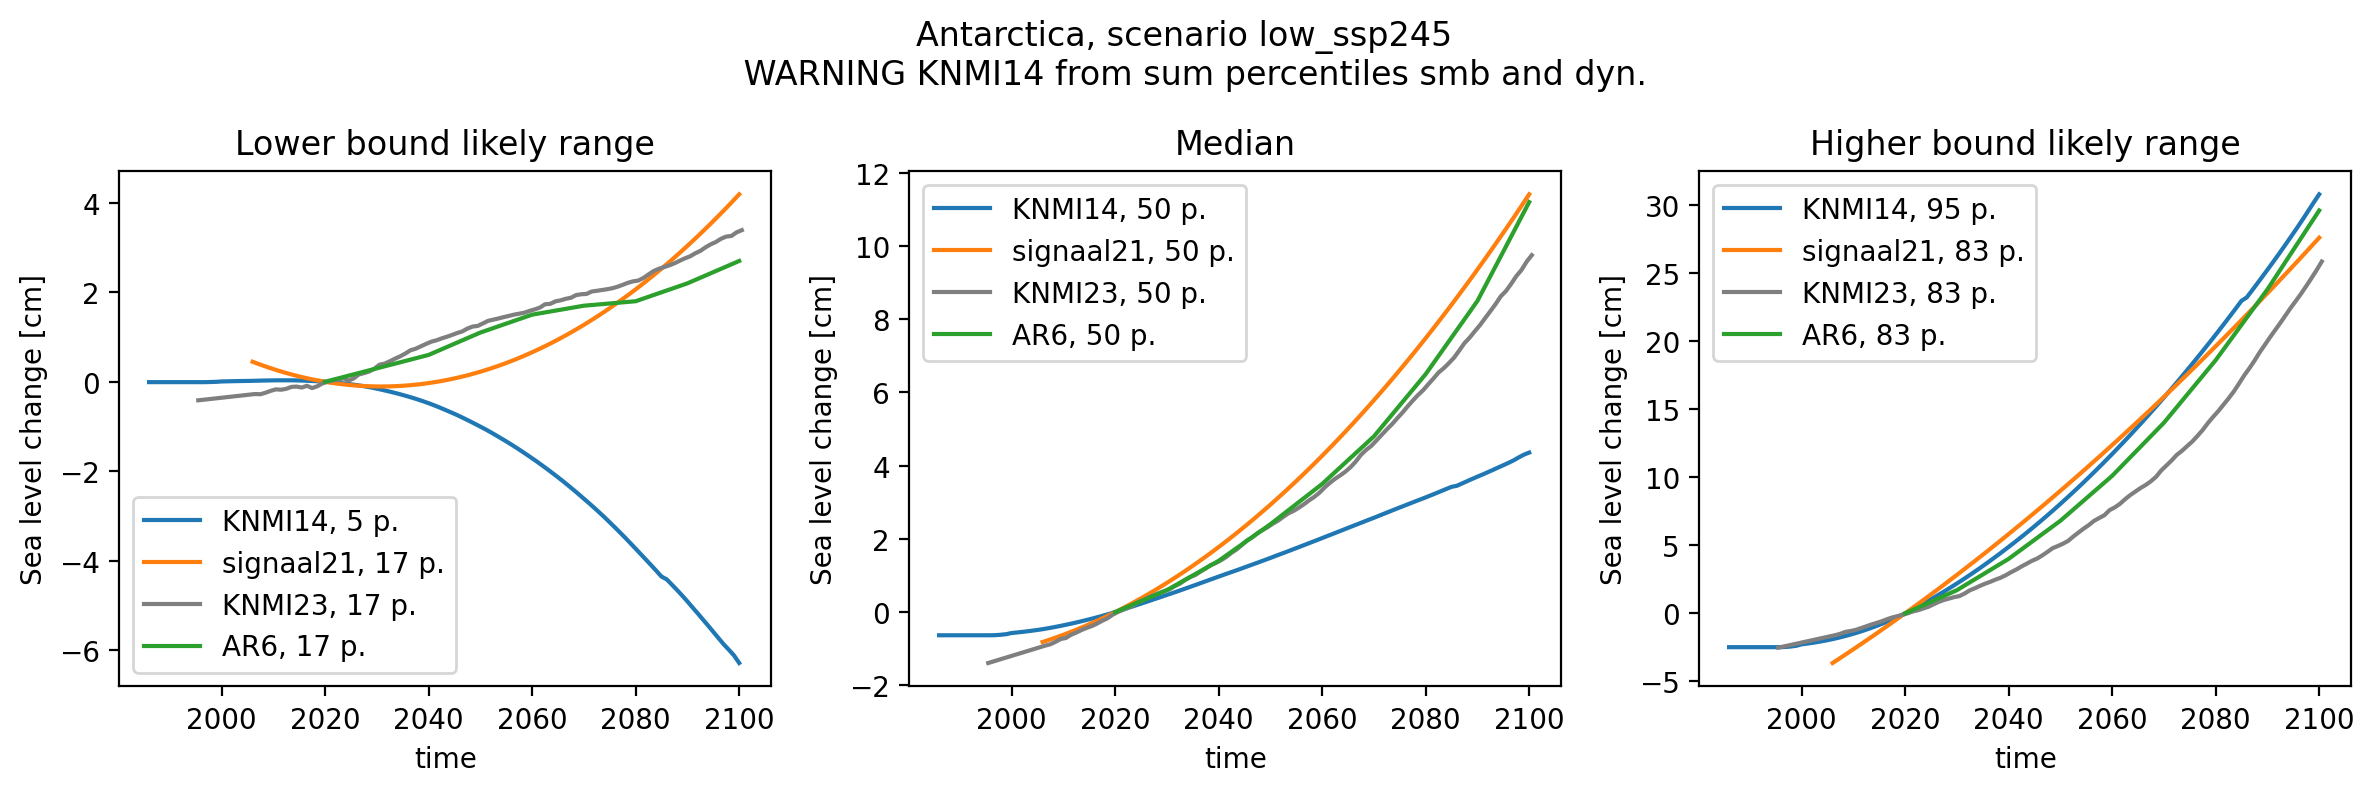

In [104]:
KNMI14_aa = KNMI14_ds['dyn_aa']+KNMI14_ds['smb_aa']
KNMI21_aa = KNMI21_ds.sel(proc='sum anta.')
KNMI23_aa = KNMI23_ds.sel(proc='Antarctica')
AR6_aa = AR6_ds['AIS']

pn = 'Antarctica'
plot_comp(KNMI14_aa, KNMI21_aa, KNMI23_aa, AR6_aa, f'{pn}, scenario {scen} \n WARNING KNMI14 from sum percentiles smb and dyn.')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

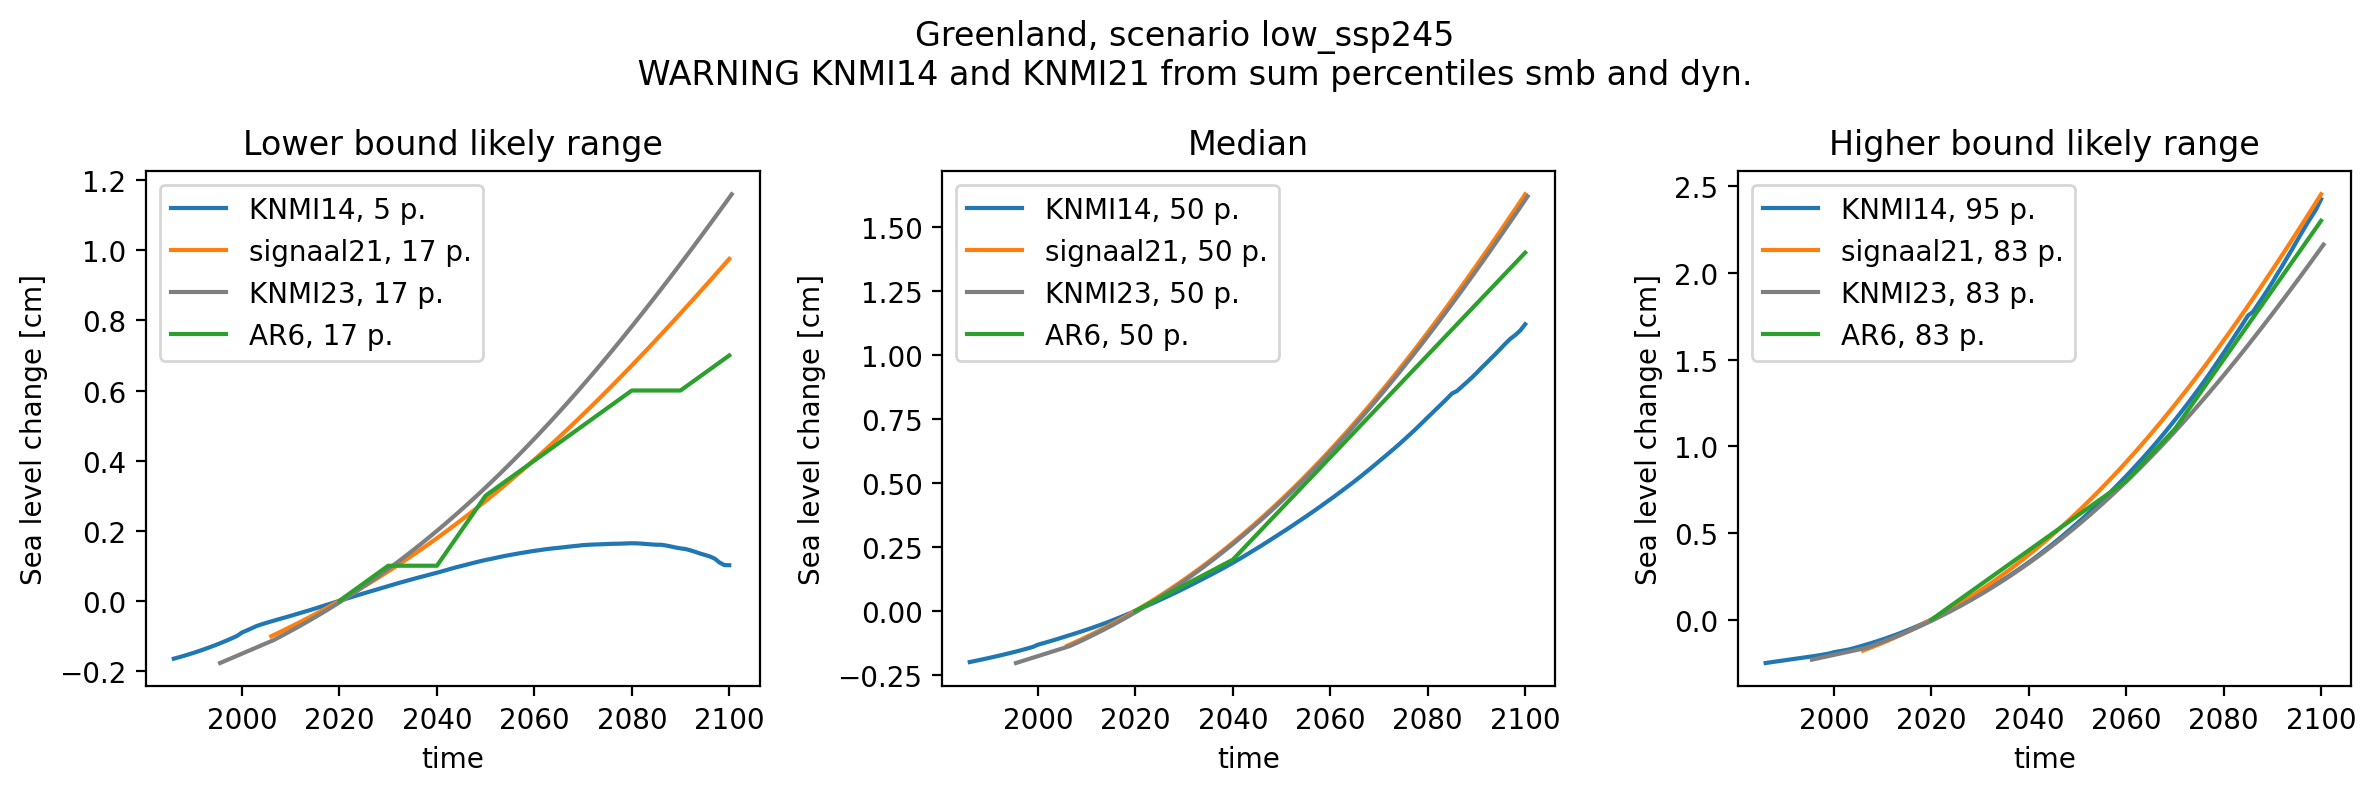

In [105]:
KNMI14_gr = KNMI14_ds['dyn_gre']+KNMI14_ds['smb_gre']
KNMI21_gr = KNMI21_ds.sel(proc='Greenland dynamics')+KNMI21_ds.sel(proc='Greenland SMB')
KNMI23_gr = KNMI23_ds.sel(proc='Greenland')
AR6_gr = AR6_ds['GIS']

pn = 'Greenland'
plot_comp(KNMI14_gr, KNMI21_gr, KNMI23_gr, AR6_gr, 
          f'{pn}, scenario {scen} \n WARNING KNMI14 and KNMI21 from sum percentiles smb and dyn.')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

No KNMI14 data for this case
No KNMI14 data for this case
No KNMI14 data for this case


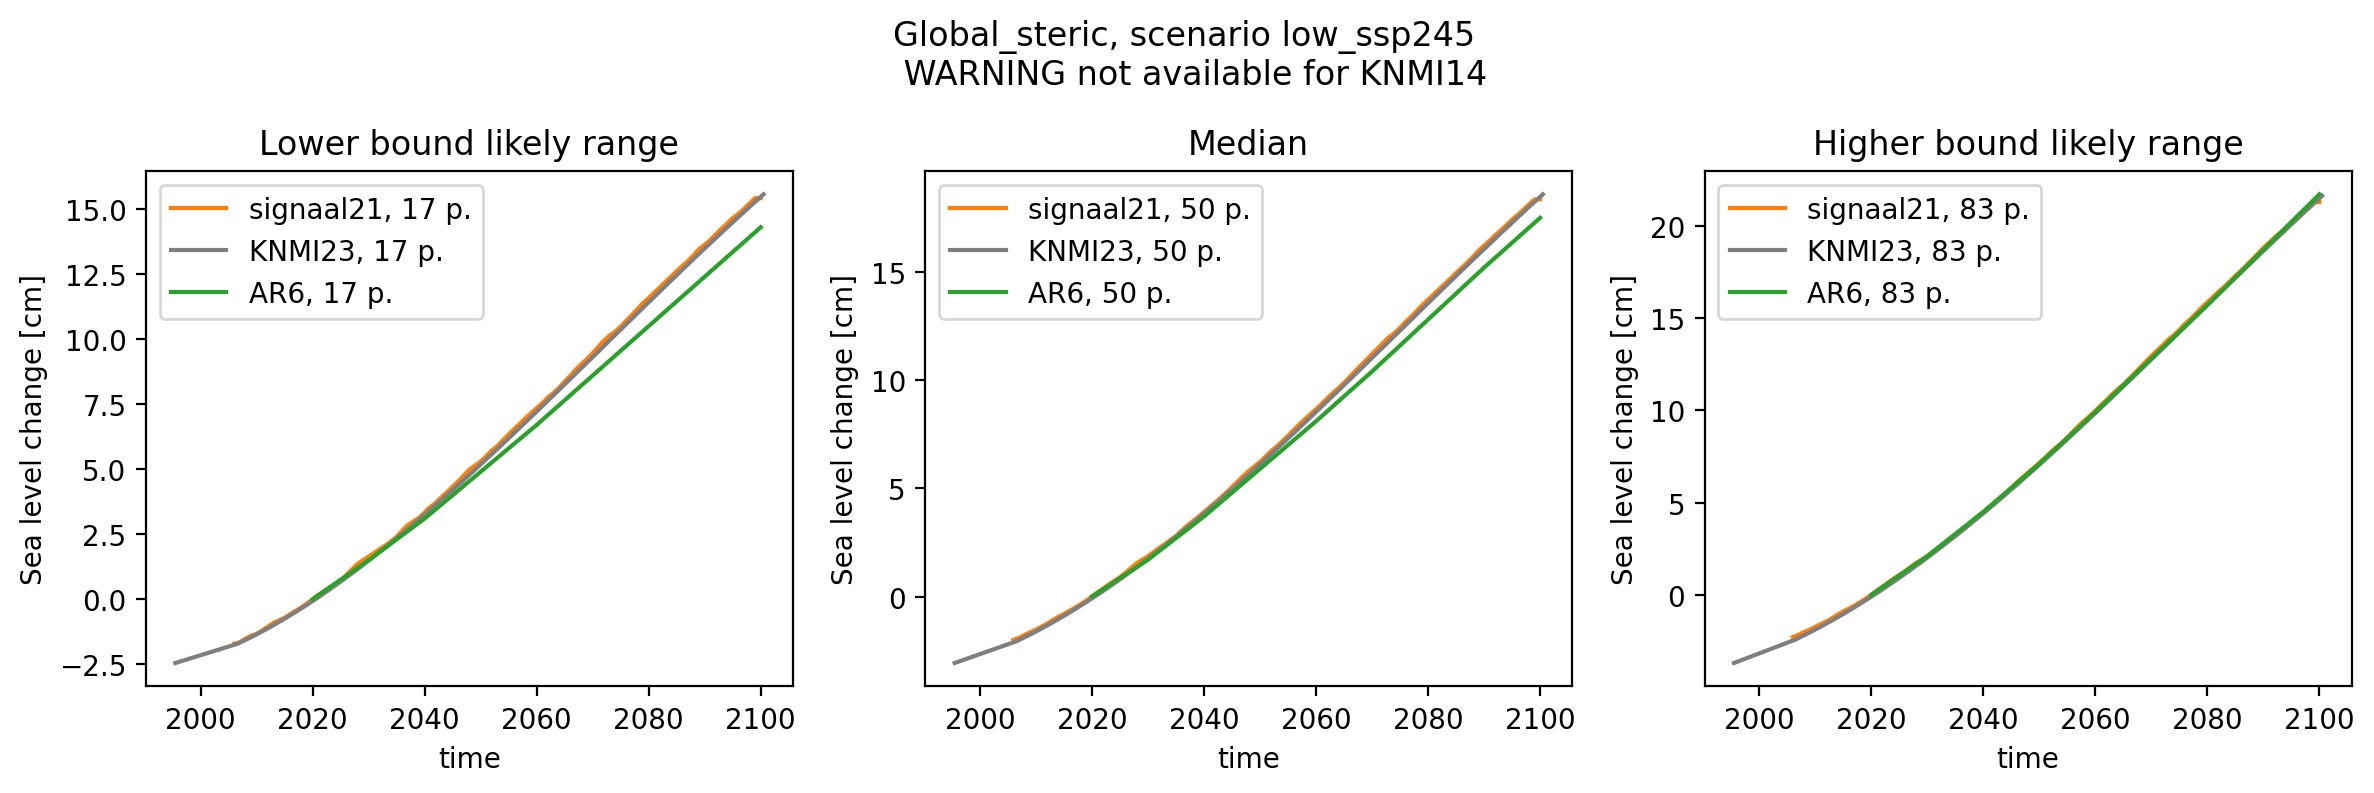

In [106]:
KNMI21_st = KNMI21_ds.sel(proc='Global steric')
KNMI23_st = KNMI23_ds.sel(proc='Global steric')
AR6_st = AR6_ds['Global steric']

pn = 'Global_steric'
plot_comp(0, KNMI21_st, KNMI23_st, AR6_st, f'{pn}, scenario {scen} \n WARNING not available for KNMI14')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

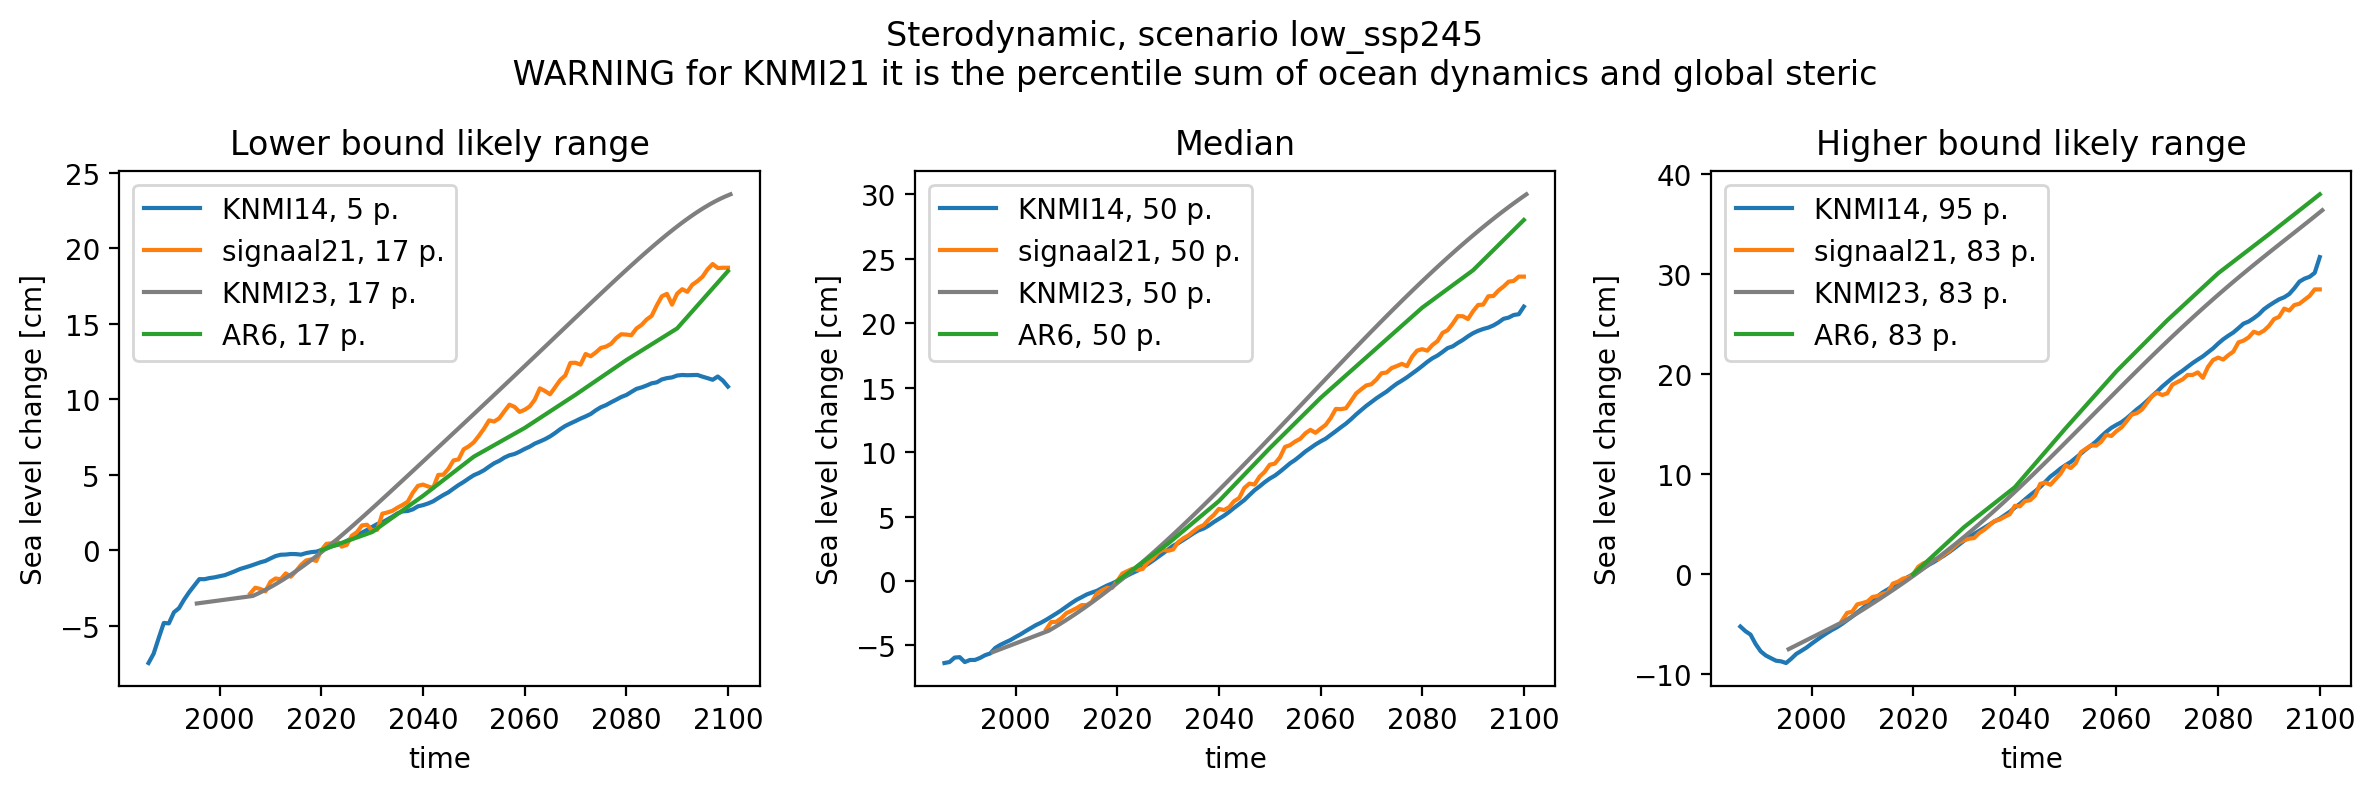

In [107]:
KNMI14_oc = KNMI14_ds['steric']
KNMI21_oc = KNMI21_ds.sel(proc='Global steric') + KNMI21_ds.sel(proc='Local ocean')
KNMI23_oc = KNMI23_ds.sel(proc='Global steric') + KNMI23_ds.sel(proc='Ocean Dynamic Sea Level')
AR6_oc = AR6_ds['oceandynamics']

pn = 'Sterodynamic'
plot_comp(KNMI14_oc, KNMI21_oc, KNMI23_oc, AR6_oc, 
          f'{pn}, scenario {scen} \n WARNING for '+ 
          'KNMI21 it is the percentile sum of ocean dynamics and global steric')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

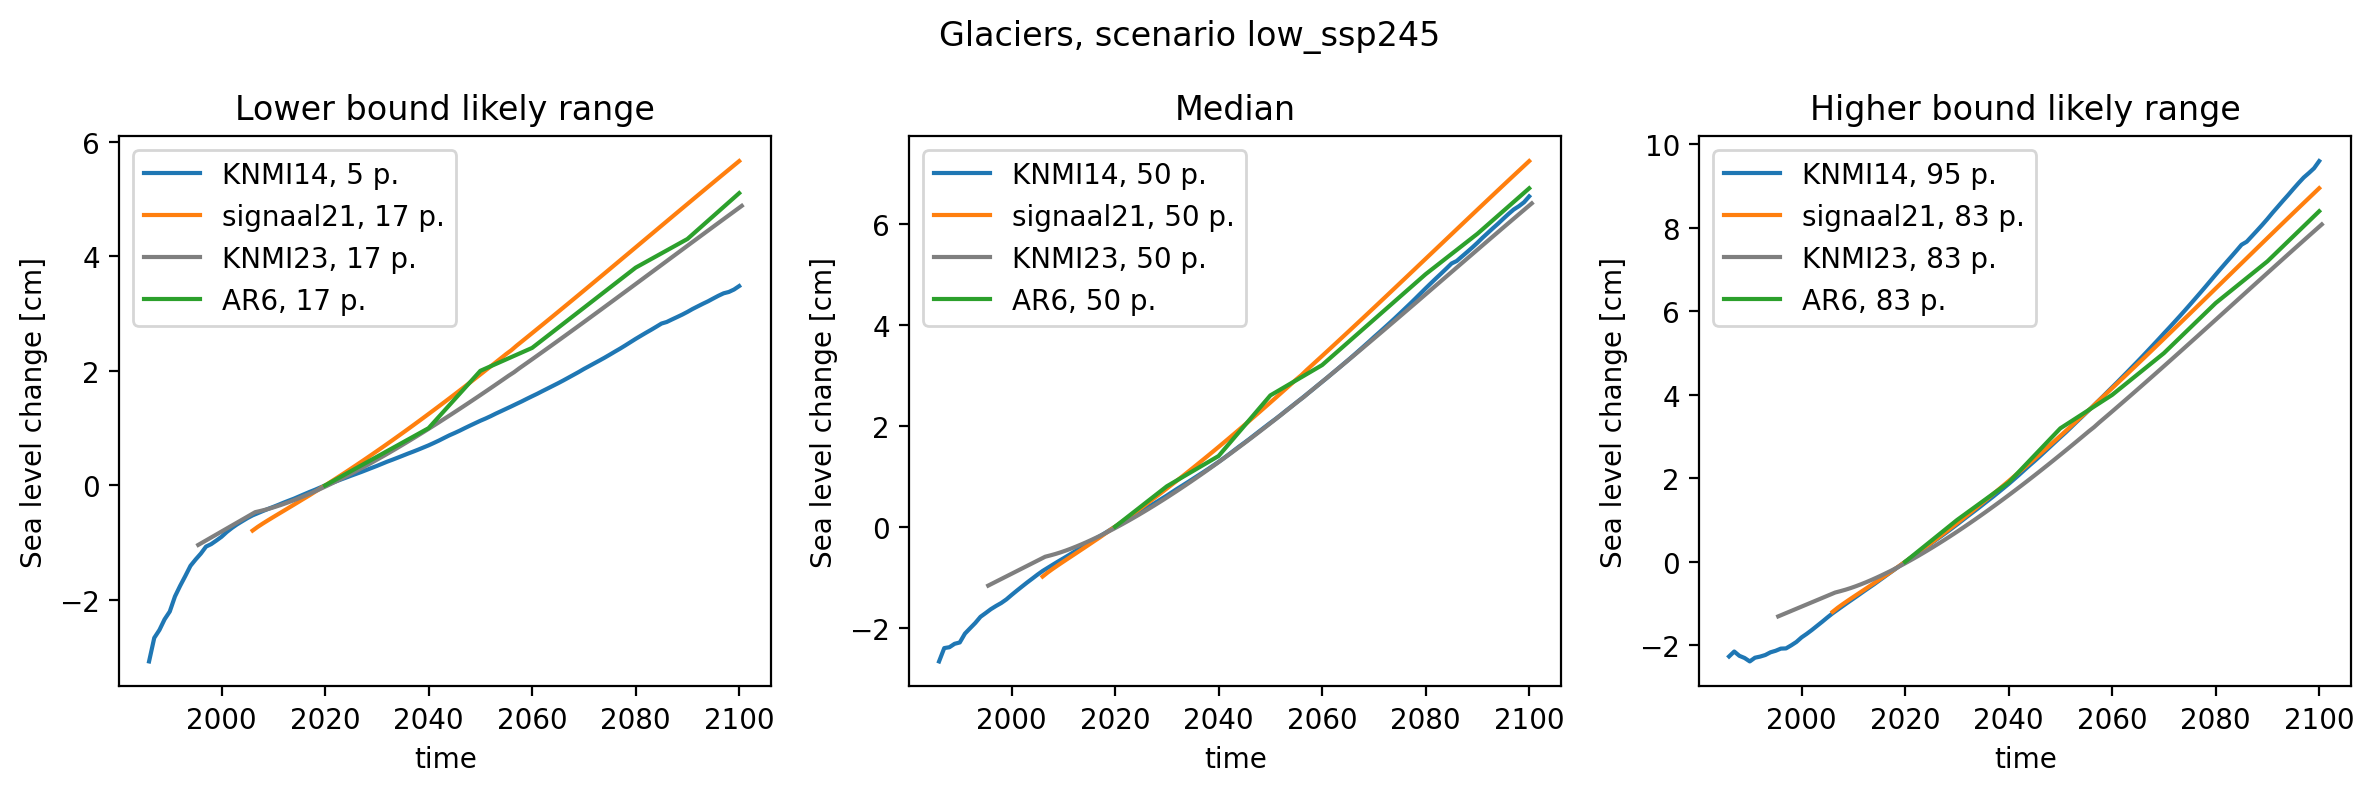

In [108]:
KNMI14_gl = KNMI14_ds['gic']
KNMI21_gl = KNMI21_ds.sel(proc='Glaciers')
KNMI23_gl = KNMI23_ds.sel(proc='Glaciers')
AR6_gl = AR6_ds['glaciers']

pn = 'Glaciers'
plot_comp(KNMI14_gl, KNMI21_gl, KNMI23_gl, AR6_gl, f'{pn}, scenario {scen}')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

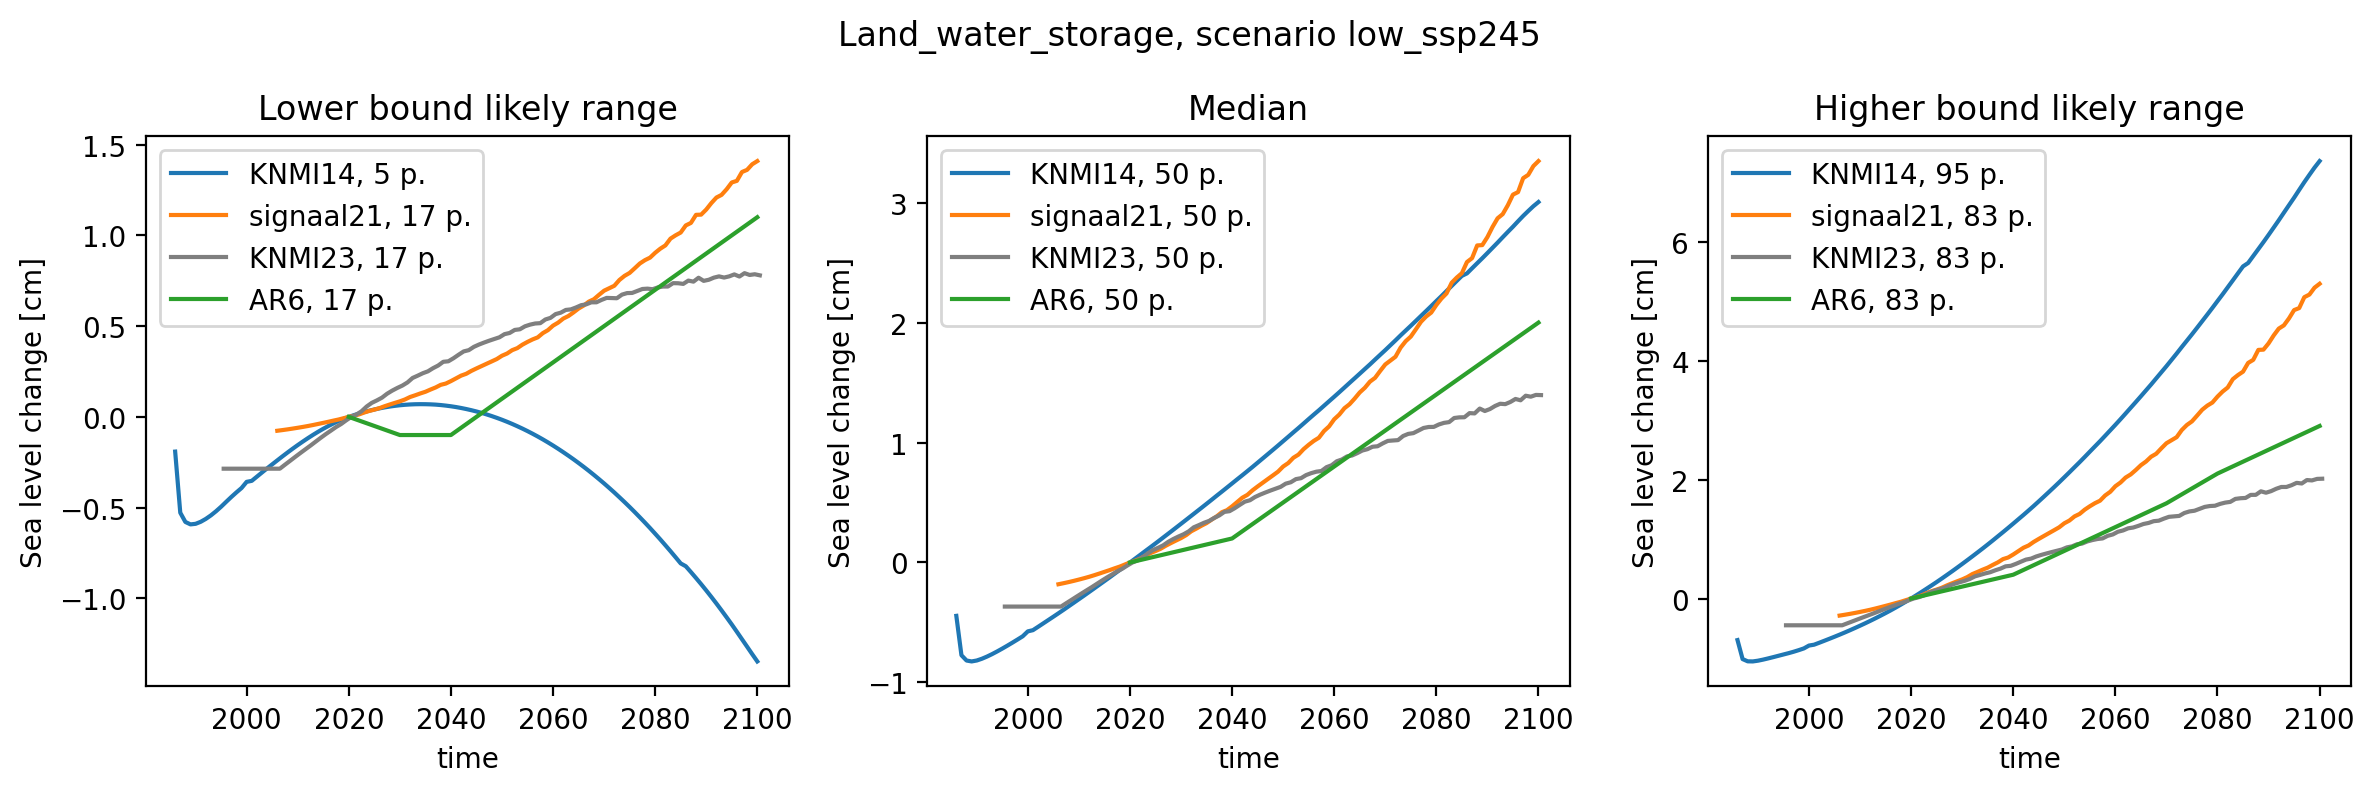

In [109]:
KNMI14_lw = KNMI14_ds['groundw']
KNMI21_lw = KNMI21_ds.sel(proc='Landwater')
KNMI23_lw = KNMI23_ds.sel(proc='Landwater')
AR6_lw = AR6_ds['landwaterstorage']

pn = 'Land_water_storage'
plot_comp(KNMI14_lw, KNMI21_lw, KNMI23_lw, AR6_lw, f'{pn}, scenario {scen}')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

No KNMI14 data for this case
No KNMI14 data for this case
No KNMI14 data for this case


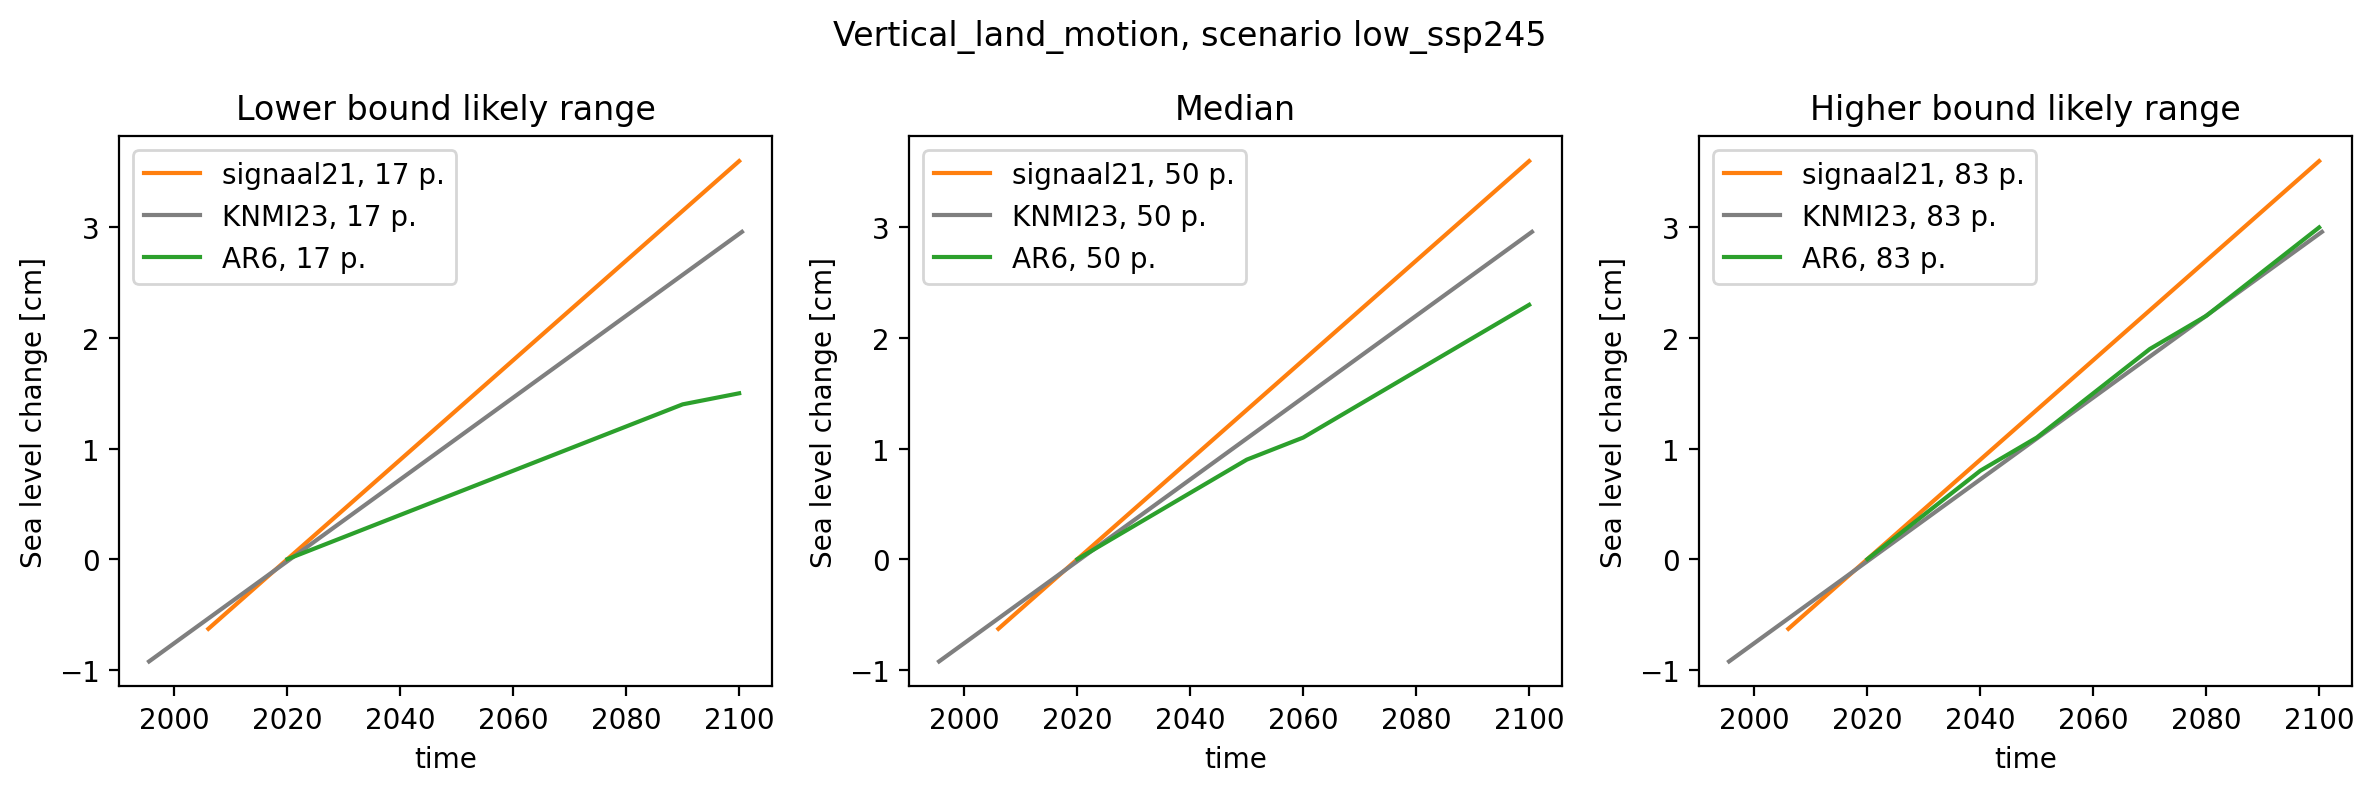

In [110]:
#KNMI14_gl = KNMI14_ds['groundw']
KNMI21_vlm = KNMI21_ds.sel(proc='Subsidence')
KNMI23_vlm = KNMI23_ds.sel(proc='GIA')
AR6_vlm = AR6_ds['verticallandmotion']

pn = 'Vertical_land_motion'
plot_comp(0, KNMI21_vlm, KNMI23_vlm, AR6_vlm, f'{pn}, scenario {scen}')

#plt.savefig(f'{fig_out}{scen}_{pn}.pdf' , dpi=150)

## Compare rates of sea level rise !!! WORK IN PROGRESS !!!

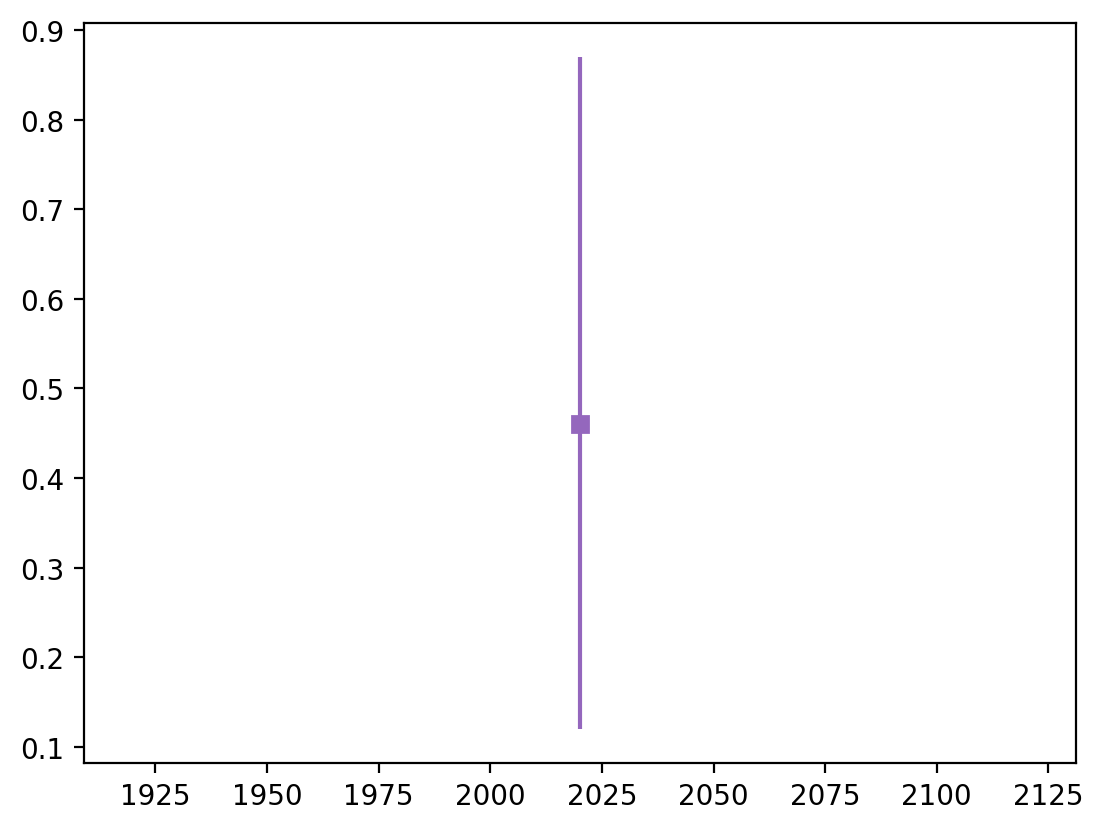

In [111]:
fig, ax = plt.subplots(1)

# AR6
ax.plot(2020, ar6_ssp245_rate_ds.sel(time=2020, quantiles=0.50).total, marker='s', color="tab:purple", label="AR6")
ax.vlines(x=2020, 
           ymin=ar6_ssp245_rate_ds.sel(time=2020, quantiles=0.05).total, 
           ymax=ar6_ssp245_rate_ds.sel(time=2020, quantiles=0.95).total, 
           color="tab:purple")

#plt.savefig("SeaLevelRates_DutchCoast_zoom.pdf", dpi=150)

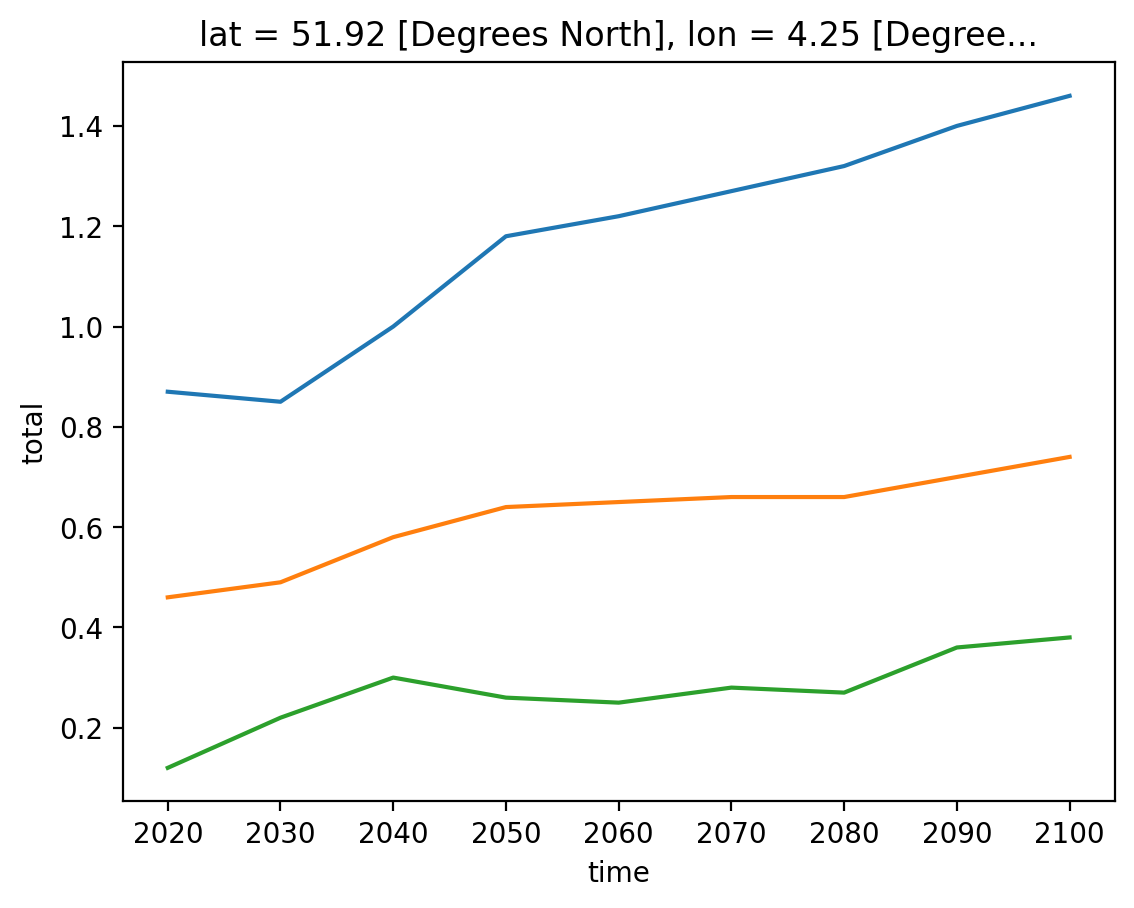

In [112]:
ar6_ssp245_rate_ds.sel(quantiles=0.95).total.plot()
ar6_ssp245_rate_ds.sel(quantiles=0.50).total.plot()
ar6_ssp245_rate_ds.sel(quantiles=0.05).total.plot()

## Compare total sea level in 2100

### Build a summary dataframe to plot

In [123]:
perc = [5, 17, 50, 83, 95]

summary_df = pd.DataFrame(index=perc)
summary_df.index.name = 'percentile'

In [124]:
# Read KNMI14

summary_df['KNMI14_low'] = [knmi_df.loc[2100, 'low_05'], 
                            np.nan, np.nan, np.nan,  
                            knmi_df.loc[2100, 'low_95']]

summary_df['KNMI14_high'] = [knmi_df.loc[2100, 'high_05'], 
                            np.nan, np.nan, np.nan,  
                            knmi_df.loc[2100, 'high_95']]


In [125]:
# Read klimaatsignaal'21

scen = ['SSP126', 'SSP245', 'SSP585']
ds = [proj_ssp126_ds, proj_ssp245_ds, proj_ssp585_ds]

for s in range(3):
    ds_2100 = []
    for pc in perc:
        ds_2100.append(ds[s].sel(proc='Total_with_sub', 
                                   time=2100, percentiles=pc).data.item() )
    
    summary_df[f'KS21_{scen[s]}'] = ds_2100


In [126]:
# Read KNMI23

ds = [KNMI23_ssp126, KNMI23_ssp245, KNMI23_ssp585]

for s in range(3):
    ds_2100 = []
    for pc in perc:
        ds_2100.append(ds[s].sel(proc='Total', 
                                 time=2100.5, percentiles=str(pc)).data.item() )
    
    summary_df[f'KNMI23_{scen[s]}'] = ds_2100

In [127]:
# Read AR6
quant = np.array(perc, dtype=float)/100

ds = [ar6_ssp126_ds, ar6_ssp245_ds, ar6_ssp585_ds]

for s in range(3):
    ds_2100 = []
    for q in quant:
        # Add 2.7 cm (=9*0.3 cm)to all AR6 numbers to shift the reference 
        # period from 1995-2014 to 1986-2005
        ds_2100.append(ds[s].total.sel(time=2100, quantiles=q).data.item() + 3)
    
    summary_df[f'AR6_{scen[s]}'] = ds_2100


In [128]:
summary_df

,KNMI14_low,KNMI14_high,KS21_SSP126,KS21_SSP245,KS21_SSP585,KNMI23_SSP126,KNMI23_SSP245,KNMI23_SSP585,AR6_SSP126,AR6_SSP245,AR6_SSP585
percentile,,,,,,,,,,,
5,27.7,50.9,31.790332,41.122429,56.055761,29.228191,42.615600,62.165357,19.400000,33.700001,47.200001
17,NaN,NaN,40.048200,49.558058,66.141475,36.433239,50.326731,71.086774,31.200001,44.200001,60.400002
50,NaN,NaN,52.766203,62.746840,82.168581,47.387145,62.344563,85.152657,50.700001,63.000000,83.800003
83,NaN,NaN,69.422155,81.028260,104.419854,61.868397,79.841122,106.014383,74.400002,87.500000,114.699997
95,75.7,98.9,82.660365,95.753211,122.732309,75.578474,98.316269,127.081787,93.300003,108.000000,141.699997


### Plot

In [132]:
def summary_fig_and_table(ax, df):
    
    mi = 0.6 # Max color intensity
    
    # Get some pastel shades for the colors
    colors1 = plt.cm.Greens(np.linspace(0, mi, len(df.index)))
    colors2 = plt.cm.Oranges(np.linspace(0, mi, len(df.index)))
    colors3 = plt.cm.Reds(np.linspace(0, mi, len(df.index)))
    
    colors = np.zeros([len(df.columns), len(df.index), 4])
    colors[[2,5,8],:,:] = colors1
    colors[[0,3,6,9],:,:] = colors2
    colors[[1,4,7,10],:,:] = colors3

    rowColours = plt.cm.Greys(np.linspace(0, mi, len(df.index)))

    # Start from white color
    colors[:,0,:] = 0
    
    index = np.arange(len(df.columns))
    bar_width = 0.6

    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(df.columns)-2)

    # Plot bars and create text labels for the table
    cell_text = []
    for row in range(len(df.index)):
        ax.bar(index[2:], 
               df.iloc[row,2:]-y_offset, 
               bar_width, 
               bottom=y_offset, 
               color=colors[2:,row,:])
        
        y_offset = df.iloc[row,2:]
    
    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(2)
    
    # Add values for KNMI14
    for row in [0, 4]:
        ax.bar([0, 1], 
               df.iloc[row,0:2]-y_offset,
               bar_width, 
               bottom=y_offset, 
               color=colors[0:2,row,:])
        
        y_offset = df.iloc[row,0:2]
        
    for row in range(len(df.index)):
        cell_text.append(['%1.0f' % x for x in df.iloc[row]])
    
    ax.set_xlim(-0.5,index[-1]+0.5)
    
    # Add a table at the bottom of the axes
    ax.table(cellText=cell_text[::-1],
             rowLabels=df.index[::-1],
             rowColours=rowColours[::-1],
             colColours=colors[:,2,:],
             colLabels=df.columns.str.split('_').str[1],
             loc='bottom')

    ax.set_xticks([])
    
    for xc in [1.5, 4.5, 7.5]:
        plt.axvline(x=xc, color='grey', linewidth=0.5, linestyle='--')
            
    for yc in np.arange(20,141,40):
        plt.axhline(y=yc, color='grey', linewidth=0.5, linestyle='--')

    # Read scenario names
    list_names = list(df.columns.str.split('_').str[0])
    scen_names = []
    [scen_names.append(x) for x in list_names if x not in scen_names]
        
    # Write the names of scenarios to plot
    xt = [0.5, 3, 6, 9]
    
    for i in range(4):
        plt.text(xt[i], 145, scen_names[i],
             ha="center", va="center",
             bbox=dict(boxstyle="round", fc='white'))
    
    return ax

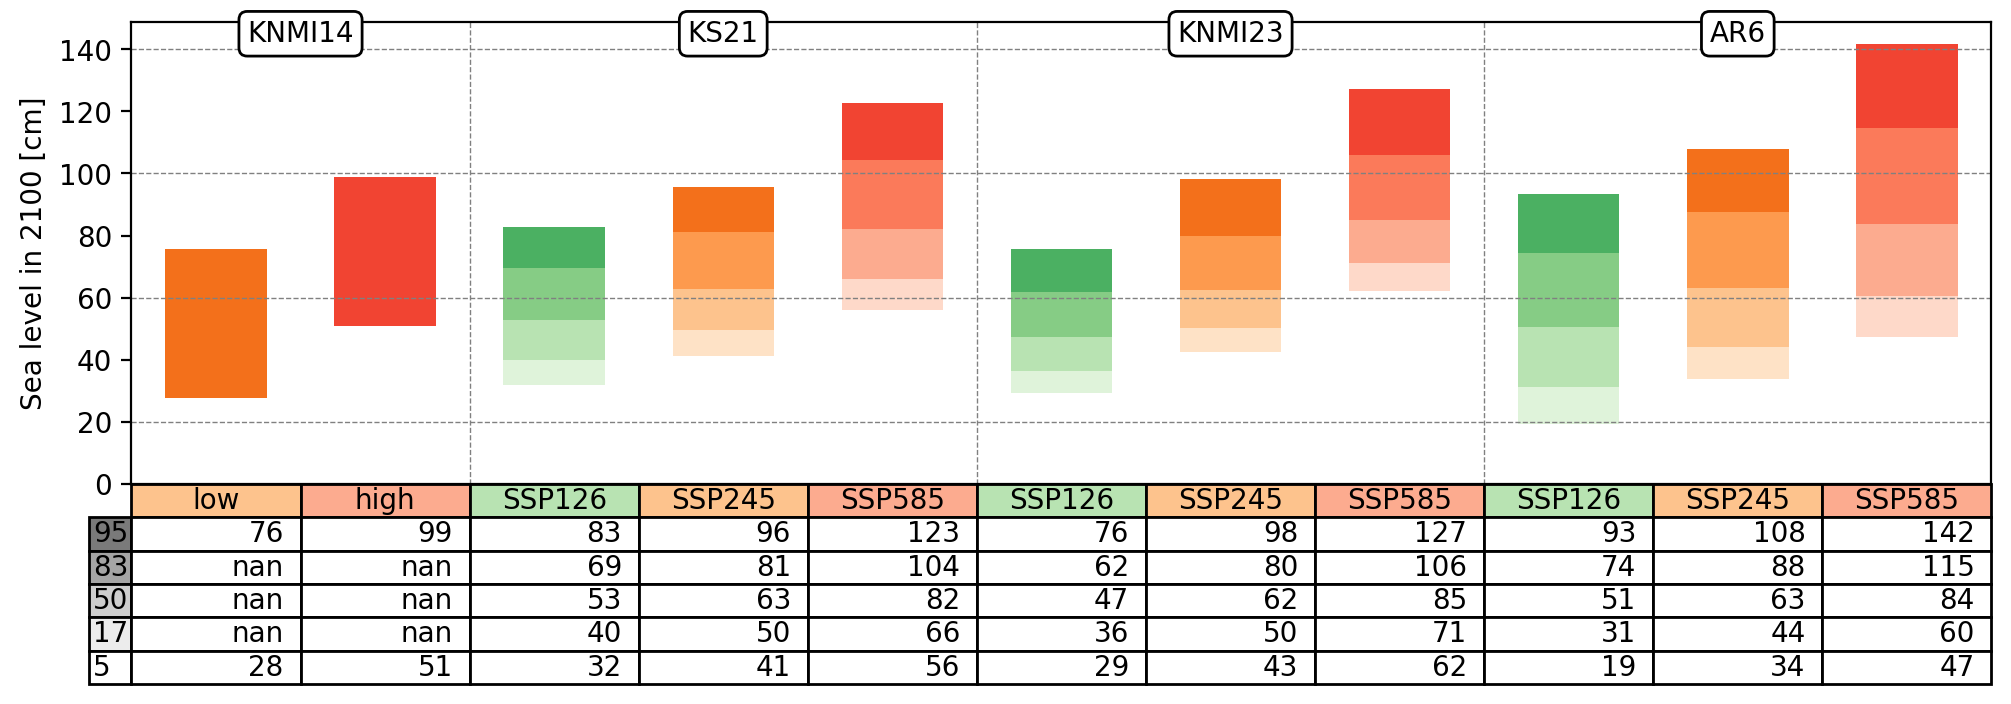

In [133]:
fig, ax = plt.subplots(1, figsize=([12,3]))

ax = summary_fig_and_table(ax, summary_df)
ax.set_ylabel('Sea level in 2100 [cm]')

plt.savefig(f'./figures/ComparisonScenarios2100.pdf', bbox_inches="tight", dpi=150)